# Machine Learning Project
By KOMAL_SINGH 

# Customer Segmentation of Mall - using K-means Clustering

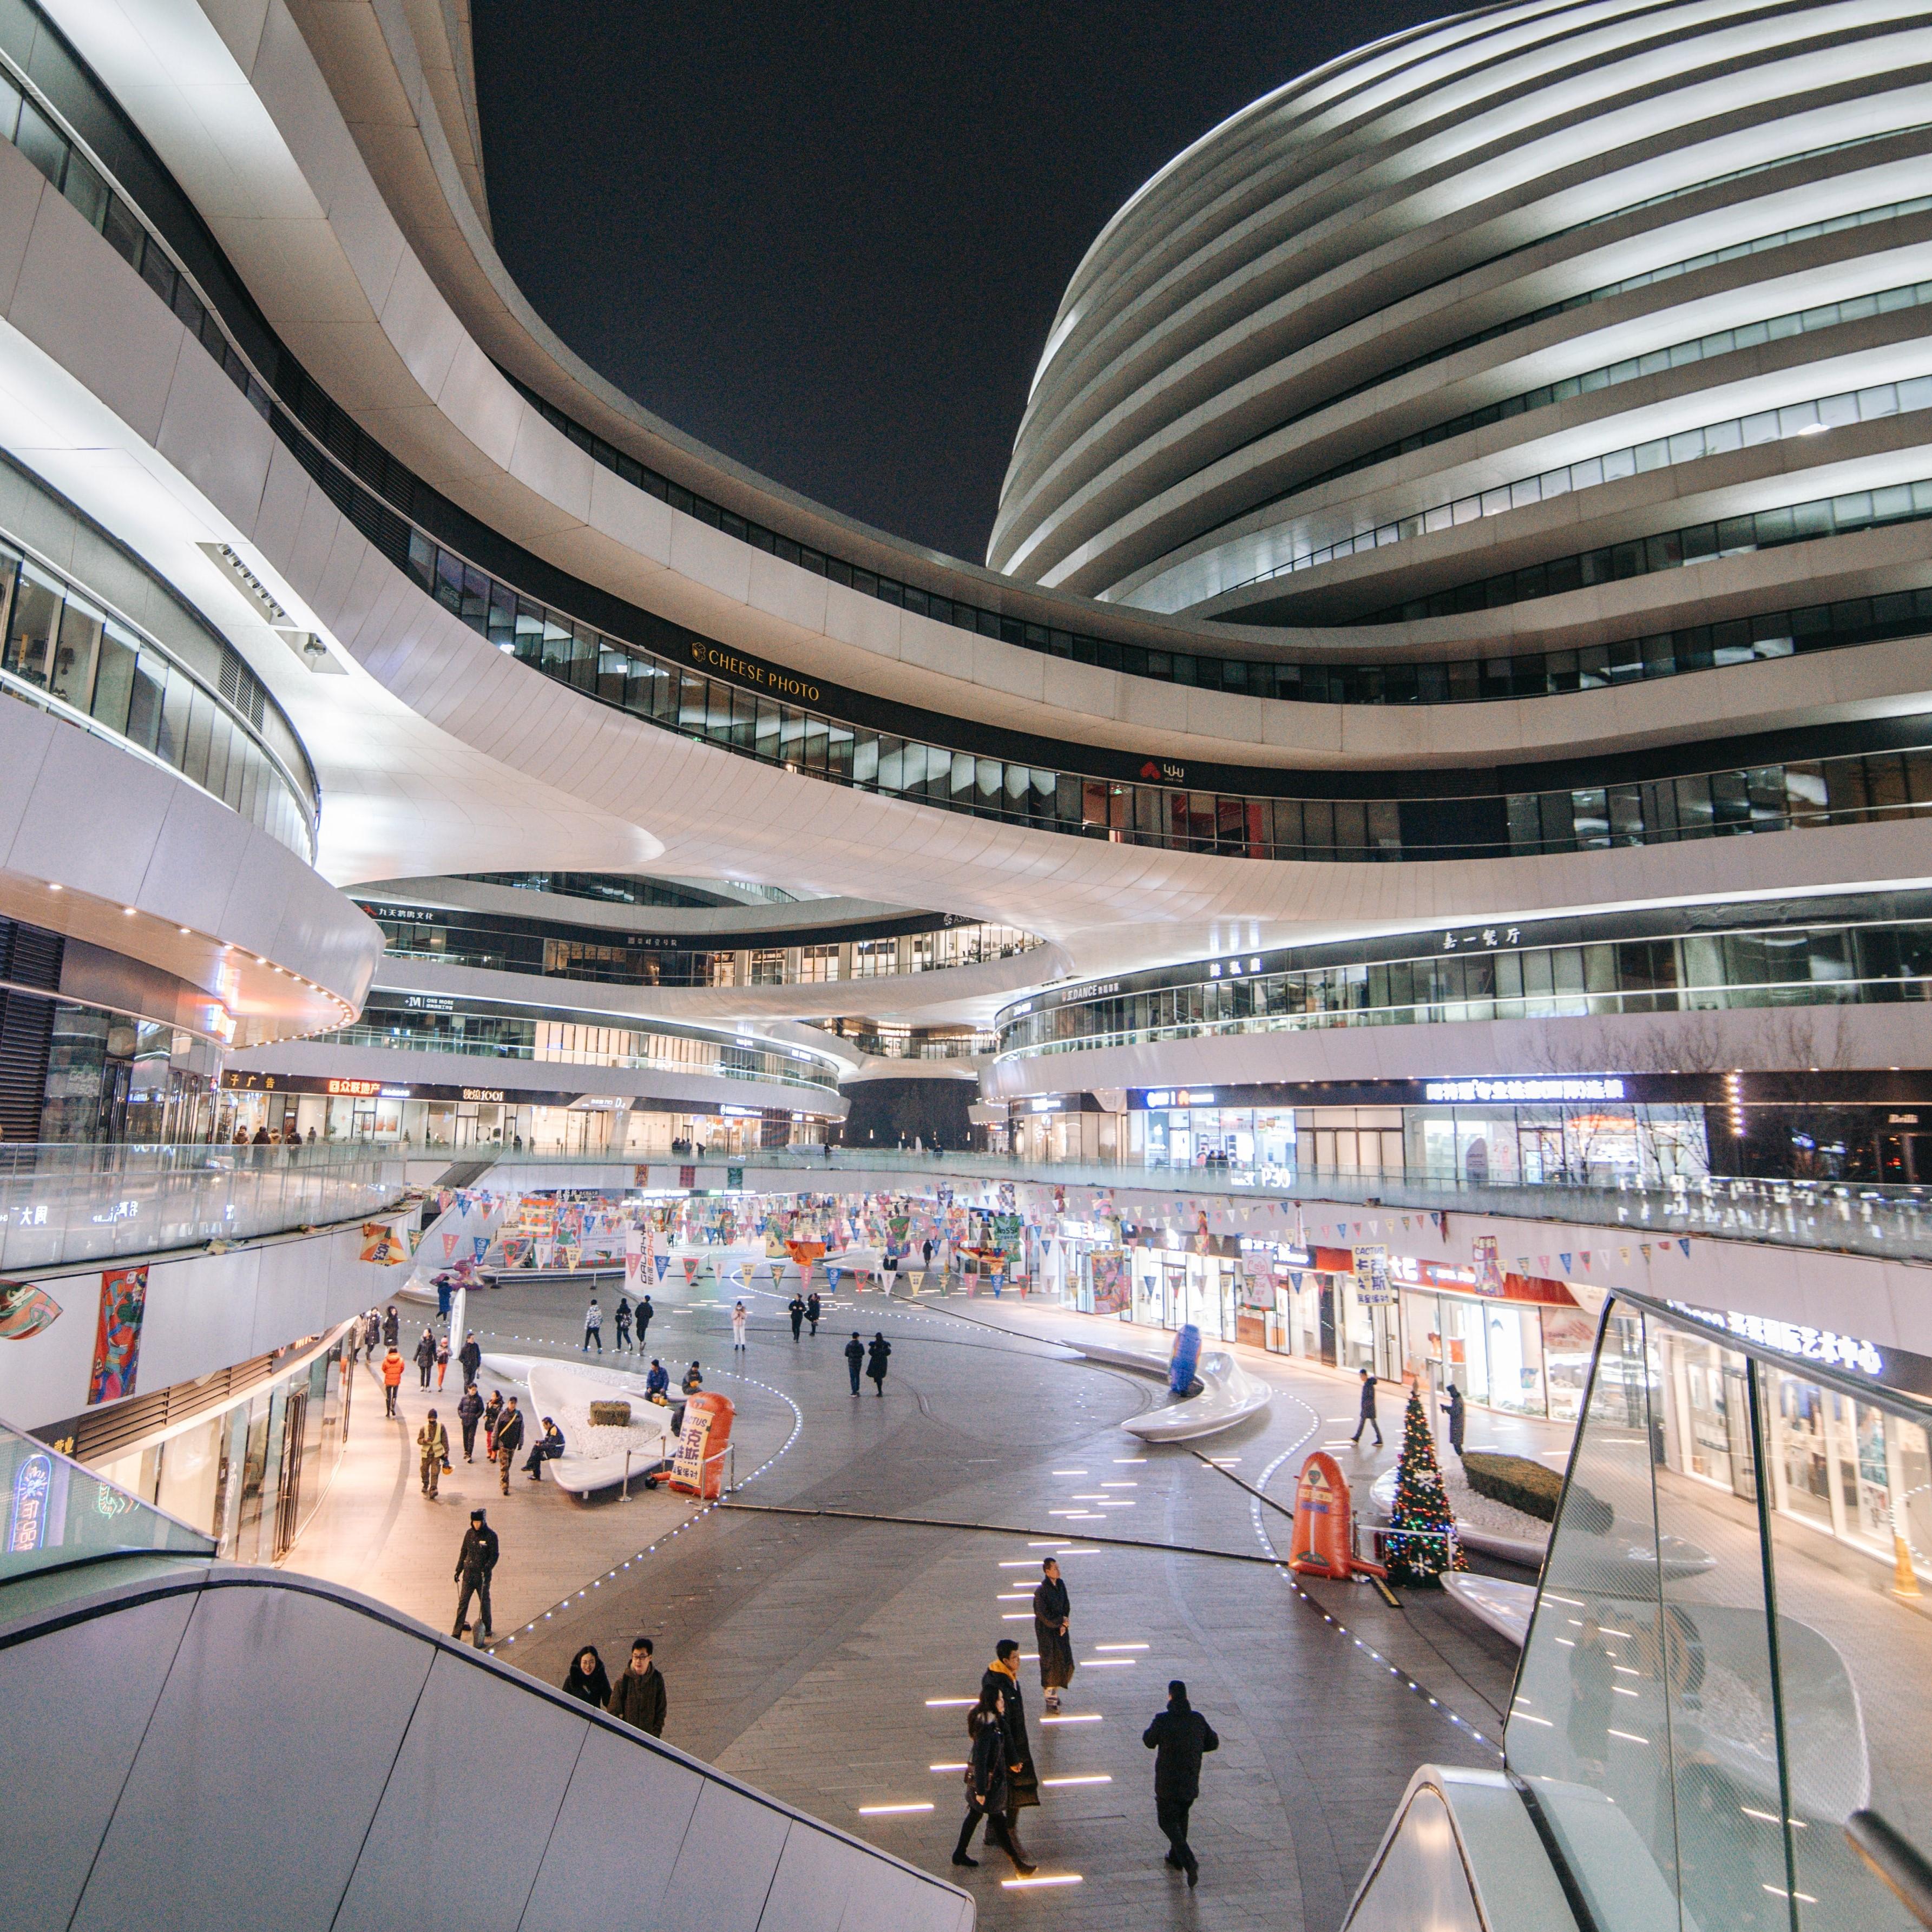

In [1]:
from IPython.display import Image
Image(filename="pesce-huang-W7PZYROl63Y-unsplashn.jpg")

# steps to be performed :

1)Import the libraries

2)Read the Dataset

3)Apply Exploratory Data Analysis (EDA) 
  -a) Handle Missing Values .
  -b) find outliers /Skewness 
  -c) Encoding 
  -d) feature scaling
  
4)Data Visualization / Analysis 

5)Baseline Model ( 1st model) 

6)Evaluate Model 
   -a) check Bias & variance
   -b) Performance ( Error/reports)
   
7)again check skewnes/outliers/scaling 

8)Next model 

9)Re-Evaluate the Model (2nd model) 

10)Apply Hyperparameter tuning (if needed)
   -( for loop , Grid search cv) 

11)Tuned Model (3rd Model) .

12)cross validation 

# 1) importing the Libraries

In [2]:
import pandas as pd                     # for data processing , read csv files                            
import numpy as np                      #for linear algebra
import matplotlib.pyplot as plt         # for Data Visualization 
import seaborn as sns                   # python library for visualization
import warnings                         # to prevent warnings 
warnings.filterwarnings('ignore')
import plotly as py                     # for Data plotting

# 2) importing the dataset

In [3]:
df = pd.read_csv("Mall_customer.csv")
df

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

In [4]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

# 3) EDA

In [5]:
print("No.of Rows",df.shape[0])
print("No.of Cols",df.shape[1])

No.of Rows 200
No.of Cols 5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### The above dataset consist 200 rows and 5 columns and there is no null values in the dataset and datatypes of the columns are in the int64 & object values.

In [7]:
df.isnull().sum()                        #data cleaning

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.duplicated().sum()               # there is no duplicate values are present 

0

In [9]:
df.head()                           # it shows initial 5 rows of Dataset

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [10]:
df.tail()                               #it shows last 5 rows of dataset

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

In [11]:
df['Spending Score (1-100)'].value_counts()

42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: Spending Score (1-100), Length: 84, dtype: int64

In [12]:
df.value_counts().sum()

200

In [13]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

### In the above dataset it gives the statistical value of the columns where the Mean value of CustomerId is 100.5 and median is 100.5 , for Age mean is 38.85 and median is 36.00 , for annual income mean is 60.56 and median is 61.50 , and for column spending score mean is 50.20 and median is 50.00 after looking upon the values of the coulmn there is no far difference in the mean and median . we can say (mean = median ) hence this data is called Normal Distribution which has zero (0) skewness and the outlier might be situated at both the side.

In [14]:
x=df.iloc[:,[3,4]]                    # selecting feature variable

In [15]:
x

Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]

In [16]:
 from scipy.stats import skew                                      # import skew 

## finding outliers

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

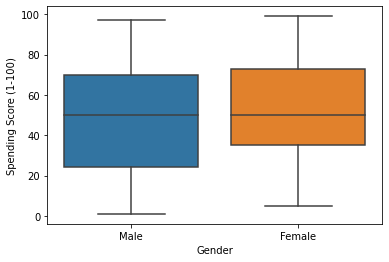

In [17]:
sns.boxplot(data=df,y="Spending Score (1-100)",x="Gender")

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

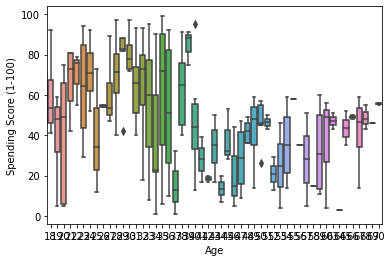

In [18]:
sns.boxplot(data=df,y="Spending Score (1-100)",x="Age")

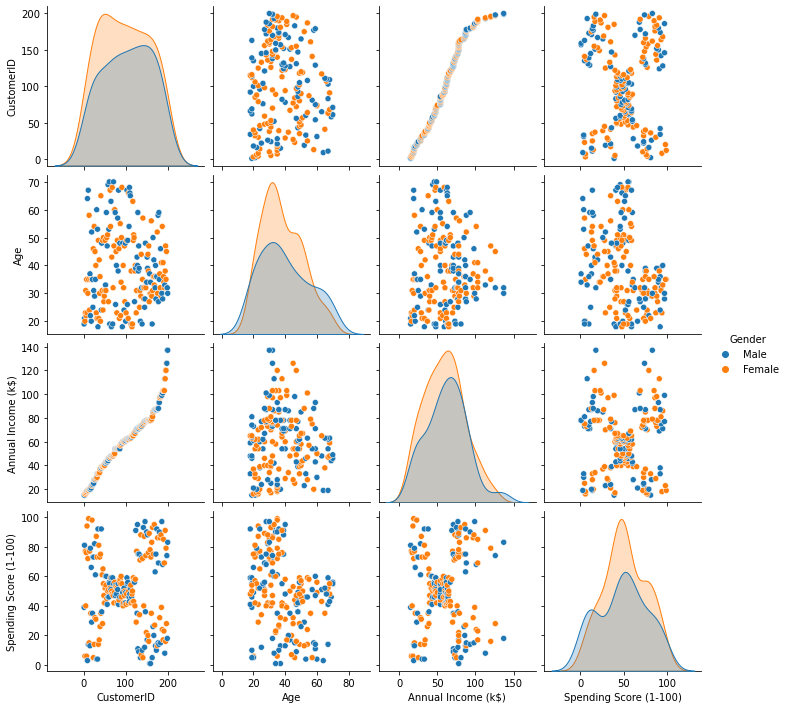

In [19]:
sns.pairplot(data=df,hue="Gender")                       # data visualization

In [20]:
df.groupby("Gender").size().max

<bound method NDFrame._add_numeric_operations.<locals>.max of Gender
Female    112
Male       88
dtype: int64>

### After visualizing the graph using pairplot the Female age is highly skewed near the age group of 50 years and the spending score is lie between the 90-100 . Hence  we can Conclude that the female customers are ranked as the most shopping customers at the mall  generating high lead score.

In [21]:
df.corr().style.background_gradient()

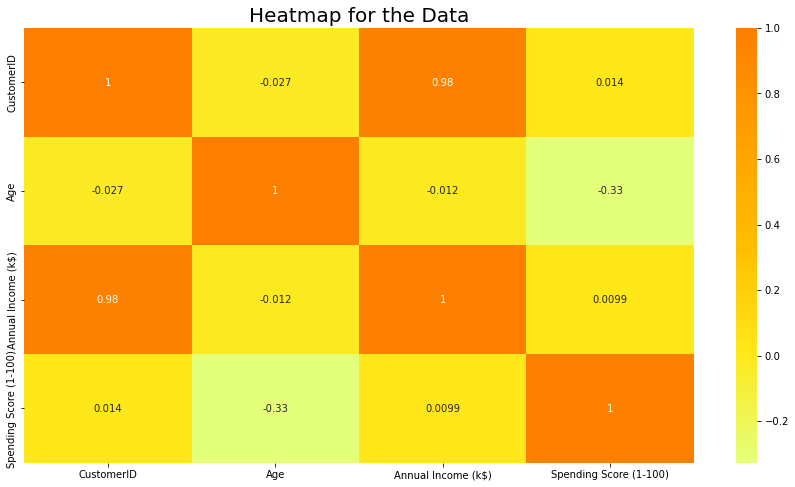

In [22]:
# We now check for Correlation between the different attributes of the Mall Customer Segementation Dataset

plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

###  The above graph shows the correlation between the different attributes of the Mall Customer Segementation Dataset, This Heat map reflects the most correlated features with Orange Color and least correlated features with yellow color.

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [24]:
x

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

# Model Evaluate - KMeans clustering

### K-means Algorithm :-  It is an iterative  algorithm that divides the unlabelled data into k different  clusters in such a way that each dataset  belongs to only one group that has similar properties and form centroids .

### K-means clustering is a clustering algorithm that aims to partition n observations into k clusters. Initialisation – K initial “means” (centroids) are generated Randomly.
– K clusters are created by associating each observation with the nearest centroid Update – The centroid of the clusters becomes the new mean, Assignment and Update are repeated iteratively until convergence The end result is that the sum of squared errors is minimised between points and their respective centroids. We will use KMeans Clustering. At first we will find the optimal clusters based on inertia and using elbow method. The distance between the centroids and the data points should be less.

In [25]:
from sklearn.cluster import KMeans                                 #import KMeans clustering 

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i , random_state =1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [26]:
wcss

[400.0,
 269.1425070447921,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.10377812115057,
 44.91118554999014,
 37.15135706793106,
 33.854106217363686,
 29.076176851244274]

In [27]:
 # Elbow method= It is a type of kmean clustering which is use to choose the optimum K value .
# wcss = within clusters sum of square 

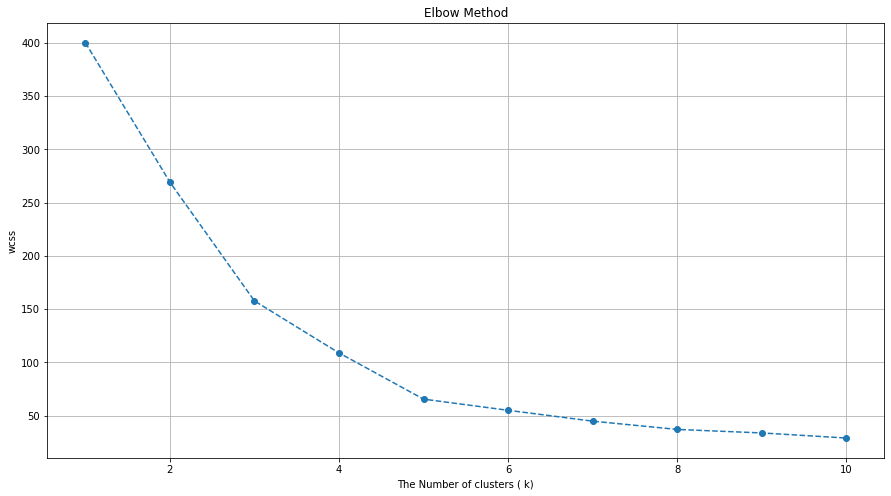

In [28]:
plt.plot(range(1,11), wcss, "o--")
plt.grid()
plt.title("Elbow Method")
plt.ylabel("wcss")
plt.xlabel('The Number of clusters ( k)')
plt.show()

### from the above graph using Elbow method , we can say that  the point which is gradually decreases deeper at the value 5 . therefore we can say the optimal no. of cluster k=5 . 

# Customer Gender Visualization

### We now create a bar graph and pie chart to check on customer Gender(Male and Female) distribution on our customer mall data set.

In [29]:
#We now check for the data Gender Unique
a=df.Gender.unique()
a

array(['Male', 'Female'], dtype=object)

In [30]:
#Lets now check on Data Gender counts for our data set.
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

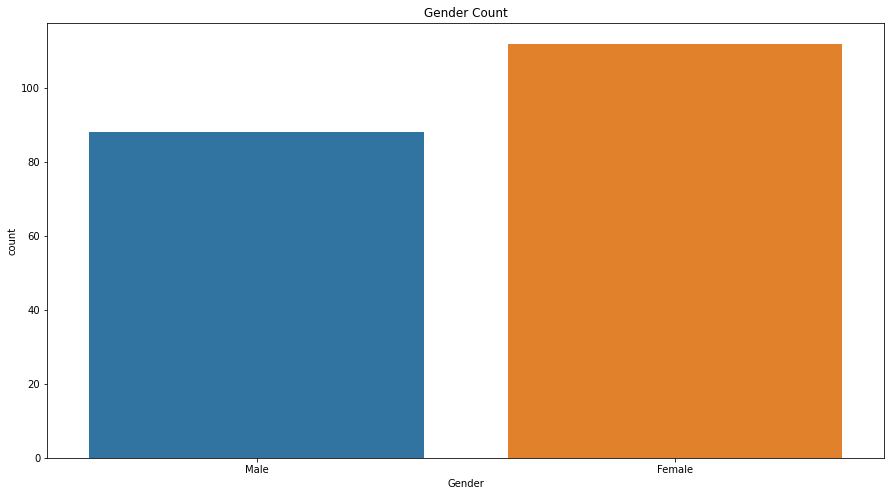

In [31]:
#We plot a graph on data gender count for women and men for our data set.
sns.countplot(df.Gender)
plt.title('Gender Count')
plt.show()

## from above graph we can conclude that females preferences is higher as compare to male.

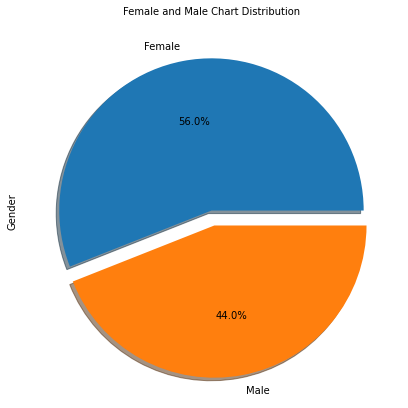

In [32]:
# we now match label on dataset gender..assign orange to male and pink to femal

#We now carry out the visualization
plt.figure(figsize=(7,7))

df["Gender"].value_counts().plot.pie(autopct="%1.1f%%",explode=(0,0.1),shadow=True)
plt.title('Female and Male Chart Distribution',color='black',fontsize=10)
plt.show()

### Now From the above piechart, we conclude that the percentage of females is 56%, whereas the percentage of male in the customer dataset is 44%

Text(0.5, 1.0, 'Age Distribution')

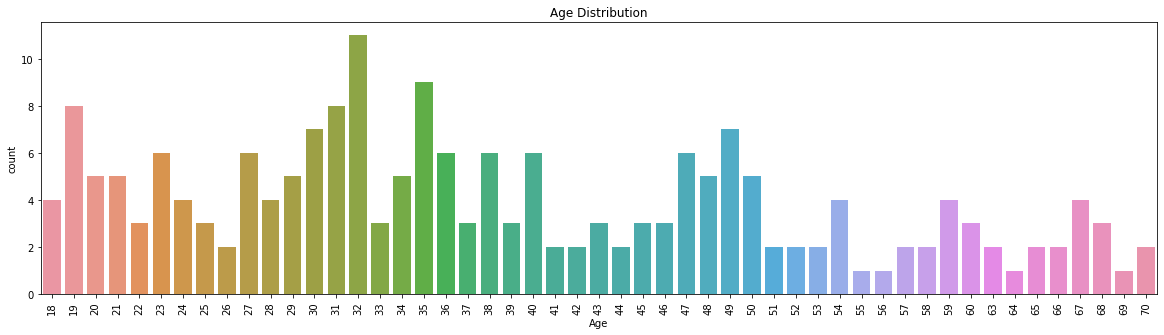

In [33]:
# Customer's distribution based on age
plt.figure(figsize=(20,5))
sns.countplot(df['Age'])
plt.xticks(rotation=90)
plt.title('Age Distribution')

### We note that people who's age group belong to 30 - 35 are mostly visiting mall than the other age groups.People at Age 32 are the Most Frequent Visitors in the Mall. People of Age 55, 56, 64, 69 are very less frequent in the Malls (older age,above 50s groups are lesser frequent in comparison). Ages from 19 and 31 are very much frequent

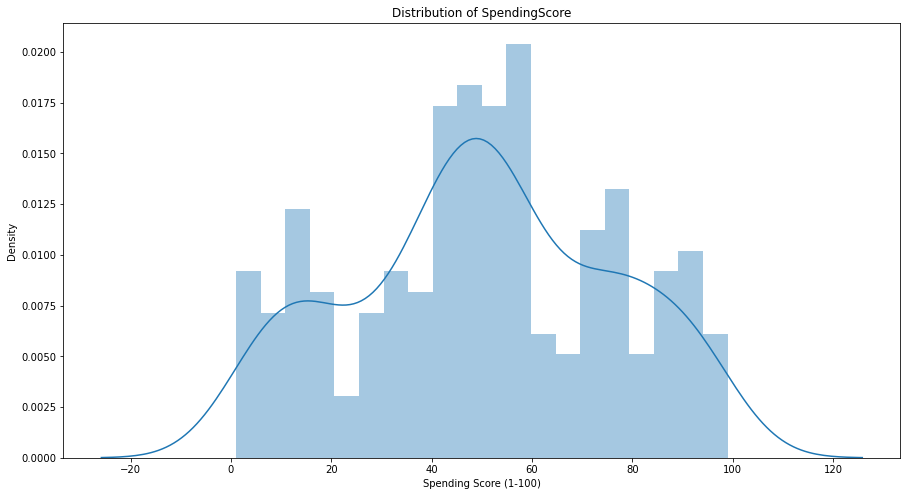

<Figure size 1296x576 with 0 Axes>

In [34]:
# We now visualize our data using Histogram to show Spending Score Distribution

plt.title('Distribution of SpendingScore')
sns.distplot(df["Spending Score (1-100)"] , bins=20)
plt.figure(figsize=(18,8))
plt.show()

### Now we will visualize the dataset using matplotlib and seaborn to understand the relationship between columns. From this, we understand that 40- 60 spending score is higher . And the person whose annual income is between " $50,000 - $1,00,000 dollars($) do more shopping in comparison to others


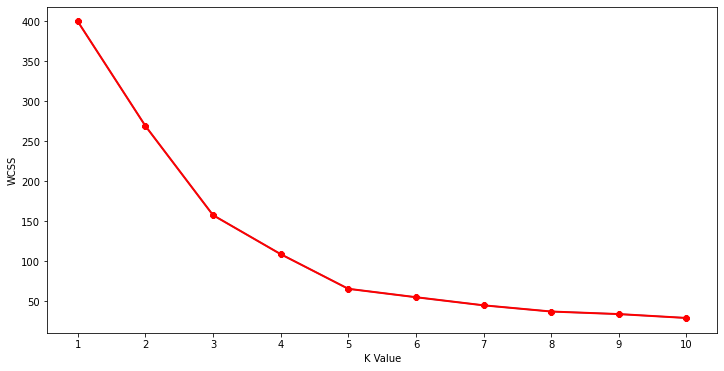

In [35]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

### This is known as the elbow graph, the x-axis being the number of clusters, the number of clusters is taken at the elbow joint point. This point is the point where making clusters is most relevant as here the value of WCSS suddenly stops decreasing. Here in the graph, after 5 the drop is minimal, so we take 5 to be the number of clusters.

#Taking 5 clusters

In [36]:
kmeans = KMeans(n_clusters=5, random_state=1)
ylabel = kmeans.fit_predict(x)

In [37]:
df

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

In [38]:
df["ykmeans"] = ylabel
df

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     ykmeans  
0          4  
1          0  
2          4  
3          0  
4          4  
..       ...  
195        3  
196        1  
197        3  
198        1  
199        3  

[200 rows x 6 columns]

In [39]:
kmeans.cluster_centers_

array([[-1.32954532,  1.13217788],
       [ 1.05500302, -1.28443907],
       [-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.30751869, -1.13696536]])

In [40]:
df["ykmeans"].value_counts()

2    81
3    39
1    35
4    23
0    22
Name: ykmeans, dtype: int64

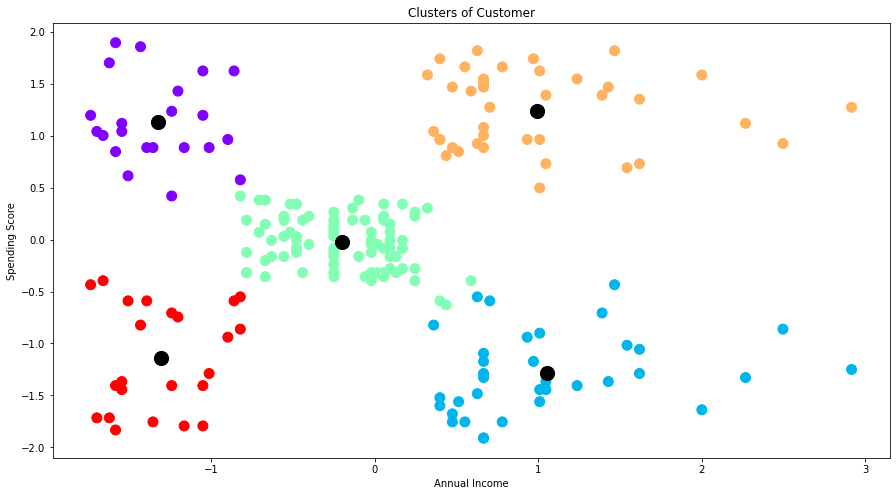

In [41]:
plt.scatter(x[:, 0], x[:, 1], c=ylabel, s=100, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="black", s=200)

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Clusters of Customer")
plt.show()

In [42]:
df[df.ykmeans==0].describe()

CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   22.000000  22.000000           22.000000               22.000000   
mean    23.090909  25.272727           25.727273               79.363636   
std     13.147185   5.257030            7.566731               10.504174   
min      2.000000  18.000000           15.000000               61.000000   
25%     12.500000  21.250000           19.250000               73.000000   
50%     23.000000  23.500000           24.500000               77.000000   
75%     33.500000  29.750000           32.250000               85.750000   
max     46.000000  35.000000           39.000000               99.000000   

       ykmeans  
count     22.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0

In [43]:
df[df.ykmeans==1].describe()

CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   35.000000  35.000000           35.000000               35.000000   
mean   164.371429  41.114286           88.200000               17.114286   
std     21.457325  11.341676           16.399067                9.952154   
min    125.000000  19.000000           70.000000                1.000000   
25%    148.000000  34.000000           77.500000               10.000000   
50%    165.000000  42.000000           85.000000               16.000000   
75%    182.000000  47.500000           97.500000               23.500000   
max    199.000000  59.000000          137.000000               39.000000   

       ykmeans  
count     35.0  
mean       1.0  
std        0.0  
min        1.0  
25%        1.0  
50%        1.0  
75%        1.0  
max        1.0

In [44]:
df.groupby("ykmeans")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()

Annual Income (k$)  Spending Score (1-100)
ykmeans                                            
0                 25.727273               79.363636
1                 88.200000               17.114286
2                 55.296296               49.518519
3                 86.538462               82.128205
4                 26.304348               20.913043

###  # Performing Classification

In [45]:
x = df.iloc[:, [3,4]]
y = df.iloc[:, -1]

In [46]:
x

Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]

In [47]:
y

0      4
1      0
2      4
3      0
4      4
      ..
195    3
196    1
197    3
198    1
199    3
Name: ykmeans, Length: 200, dtype: int32

In [48]:
# Applying train test split model 
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

In [49]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    train = model.score(xtrain, ytrain)
    test = model.score(xtest, ytest)
    
    print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n\n")
    print(classification_report(ytest, ypred))
    return model

In [50]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

In [51]:
logreg = mymodel(LogisticRegression())

Training Accuracy : 0.9928571428571429
Testing Accuracy : 0.95


              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       1.00      0.91      0.95        11
           2       0.88      1.00      0.93        21
           3       1.00      1.00      1.00        11
           4       1.00      0.89      0.94         9

    accuracy                           0.95        60
   macro avg       0.97      0.93      0.95        60
weighted avg       0.96      0.95      0.95        60



In [52]:
knn = mymodel(KNeighborsClassifier(n_neighbors=5))

Training Accuracy : 0.9714285714285714
Testing Accuracy : 0.9833333333333333


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       0.95      1.00      0.98        21
           3       1.00      1.00      1.00        11
           4       1.00      0.89      0.94         9

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [53]:
svm = mymodel(SVC())

Training Accuracy : 0.9785714285714285
Testing Accuracy : 0.9833333333333333


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       0.95      1.00      0.98        21
           3       1.00      1.00      1.00        11
           4       1.00      0.89      0.94         9

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [54]:
dt = mymodel(DecisionTreeClassifier())

Training Accuracy : 1.0
Testing Accuracy : 0.9666666666666667


              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       1.00      1.00      1.00        11
           2       0.91      1.00      0.95        21
           3       1.00      1.00      1.00        11
           4       1.00      0.89      0.94         9

    accuracy                           0.97        60
   macro avg       0.98      0.95      0.97        60
weighted avg       0.97      0.97      0.97        60



In [55]:
bnb = mymodel(BernoulliNB())

Training Accuracy : 0.42857142857142855
Testing Accuracy : 0.35


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00        11
           2       0.35      1.00      0.52        21
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         9

    accuracy                           0.35        60
   macro avg       0.07      0.20      0.10        60
weighted avg       0.12      0.35      0.18        60



In [56]:
mnb = mymodel(MultinomialNB())

Training Accuracy : 0.6857142857142857
Testing Accuracy : 0.6166666666666667


              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.82      0.90        11
           2       0.53      0.86      0.65        21
           3       0.33      0.09      0.14        11
           4       0.20      0.11      0.14         9

    accuracy                           0.62        60
   macro avg       0.59      0.58      0.56        60
weighted avg       0.58      0.62      0.57        60



In [57]:
gnb = mymodel(GaussianNB())

Training Accuracy : 0.9785714285714285
Testing Accuracy : 0.9833333333333333


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       0.95      1.00      0.98        21
           3       1.00      1.00      1.00        11
           4       1.00      0.89      0.94         9

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



# Applying Hyperperameter tuning - on svm 

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [59]:
pipe = Pipeline(
                steps=[
                   ("scaler",StandardScaler()),
                   ("svm",SVC())
               ]
)

In [60]:
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC())])

In [61]:
pipe.fit(xtrain,ytrain)
ypred = pipe.predict(xtest)

In [62]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       0.95      1.00      0.98        21
           3       1.00      1.00      1.00        11
           4       1.00      0.89      0.94         9

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [63]:
train = pipe.score(xtrain,ytrain)
test = pipe.score(xtest,ytest)

print(f"Training Accuracy:- {train}\n Testing Accuracy:- {test}")

Training Accuracy:- 0.9785714285714285
 Testing Accuracy:- 0.9833333333333333


In [64]:
from sklearn.model_selection import GridSearchCV
parameter = {
             "C":[0.001,0.01,0.1,1,10,100],
             "gamma":[0.001,0.01,0.1,1,10,100],
             "kernel":["rbf"]
     
}

In [65]:
grid = GridSearchCV(SVC(), parameter, verbose=2)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.001, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.001, gamma=0.

[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ..........................C=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ..........................C=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf']},
             verbose=2)

In [66]:
grid.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [67]:
grid.best_score_

0.9714285714285715

In [68]:
grid.best_estimator_

SVC(C=1, gamma=0.001)

In [69]:
svm = grid.best_estimator_
svm.fit(xtrain,ytrain)
ypred = svm.predict(xtest)

In [70]:
svm = mymodel(SVC())

Training Accuracy : 0.9785714285714285
Testing Accuracy : 0.9833333333333333


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       0.95      1.00      0.98        21
           3       1.00      1.00      1.00        11
           4       1.00      0.89      0.94         9

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



### Hence from the above Algorithm i can conclude that  both the SVM model  are giving the best accuracy .

## CONCLUSION

1) This study demonstrates that client segmentation in shopping malls is achievable despite the fact that this form of machine learning application is highly useful in the market, a manager can concentrate all of his or her attention on each cluster that has been discovered and meet all of their requirements.

1) Mall managers must be able to understand what customers require and, more importantly, how to meet those needs. analyze their purchasing habits, and establish frequent encounters with customers that make them feel comfortable in order to satisfy their demands.